In [1]:
#Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,precision_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the dataset
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data Science Class resources/dataset1-master/heartdisease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [4]:
df.shape

(200, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    200 non-null object
chol        200 non-null object
fbs         200 non-null object
restecg     200 non-null int64
thalach     200 non-null object
exang       200 non-null object
oldpeak     200 non-null object
slope       200 non-null object
ca          200 non-null object
thal        200 non-null object
num         200 non-null int64
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [7]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [8]:
#Checking the null values(if any)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
df= df.replace({'?': np.nan}).astype(float)

In [10]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [11]:
#filling the missing values
df['fbs'].mode()

0    0.0
dtype: float64

In [12]:
df['fbs'].fillna(0,inplace=True)

In [13]:
df['exang'].mode()

0    1.0
dtype: float64

In [14]:
df['exang'].fillna(1,inplace=True)

In [15]:
df['oldpeak'].mode()

0    0.0
dtype: float64

In [16]:
df['oldpeak'].fillna(0,inplace=True)

In [17]:
df['slope'].mode()

0    2.0
dtype: float64

In [18]:
df['slope'].fillna(2,inplace=True)

In [19]:
df['ca'].mode()

0    0.0
dtype: float64

In [20]:
df['ca'].fillna(0,inplace=True)

In [21]:
df['thal'].mode()

0    7.0
dtype: float64

In [22]:
df['thal'].fillna(7,inplace=True)

In [23]:
df['trestbps'].fillna(df['trestbps'].median(),inplace=True)

In [24]:
df['chol'].fillna(df['chol'].median(),inplace=True)

In [25]:
df['thalach'].fillna(df['thalach'].median(),inplace=True)

In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

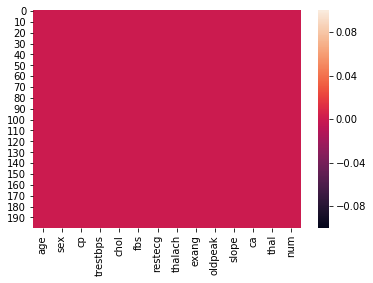

In [27]:
sns.heatmap(df.isnull())
plt.show()

In [28]:
#Statistical Summary of the Data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,132.710000,180.050000,0.340000,0.735000,122.055000,0.740000,0.951000,2.065000,0.0,6.880000,1.520000
std,7.811697,0.171015,0.795701,18.335947,112.221727,0.474898,0.683455,18.876269,0.439735,1.110344,0.471046,0.0,0.589353,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,0.000000,2.000000,0.0,7.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,0.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,0.0,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


In [29]:
#checking the correlation
dfcor=df.corr()

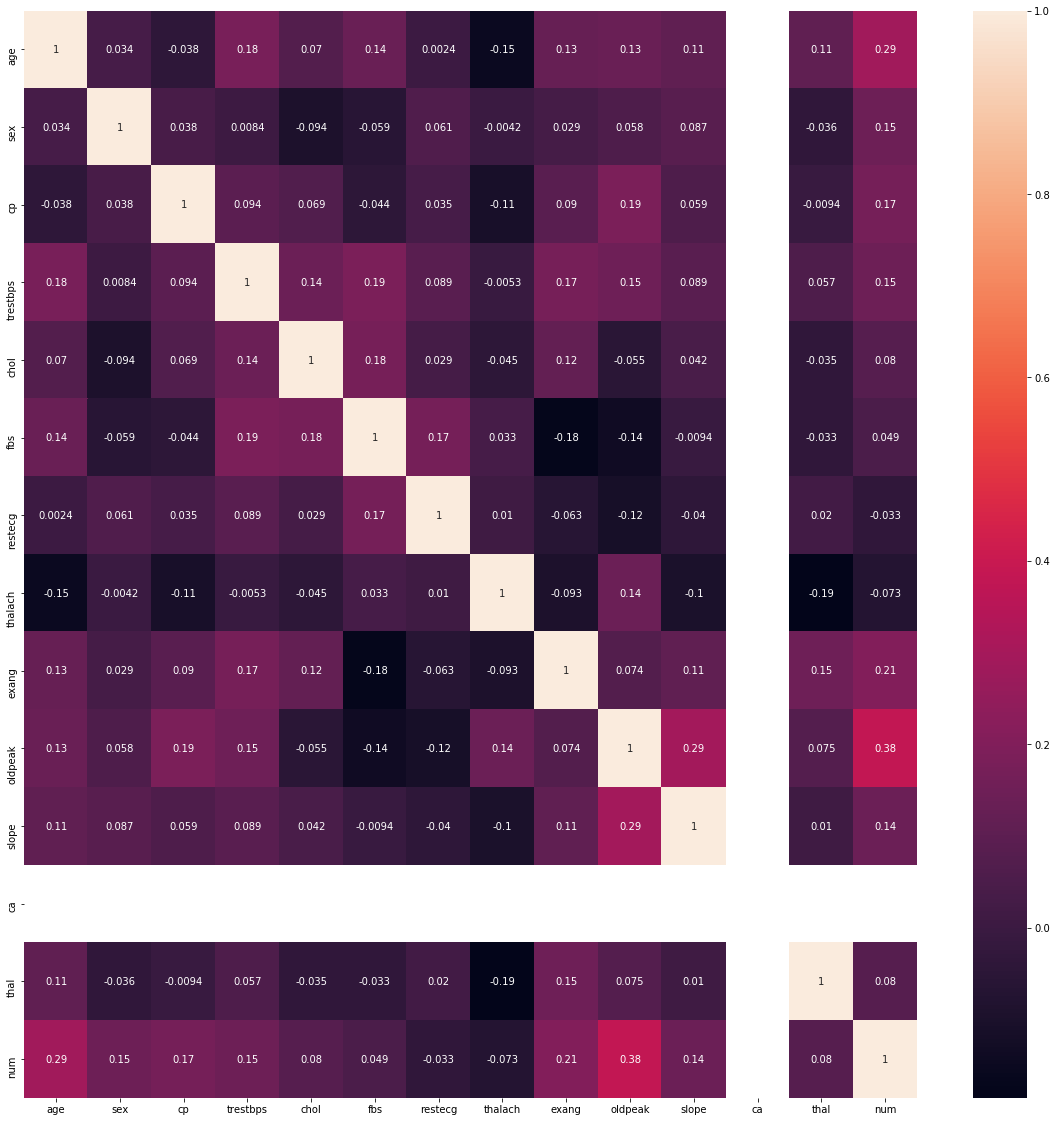

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True)
plt.show()

In [31]:
#Univariate Analysis

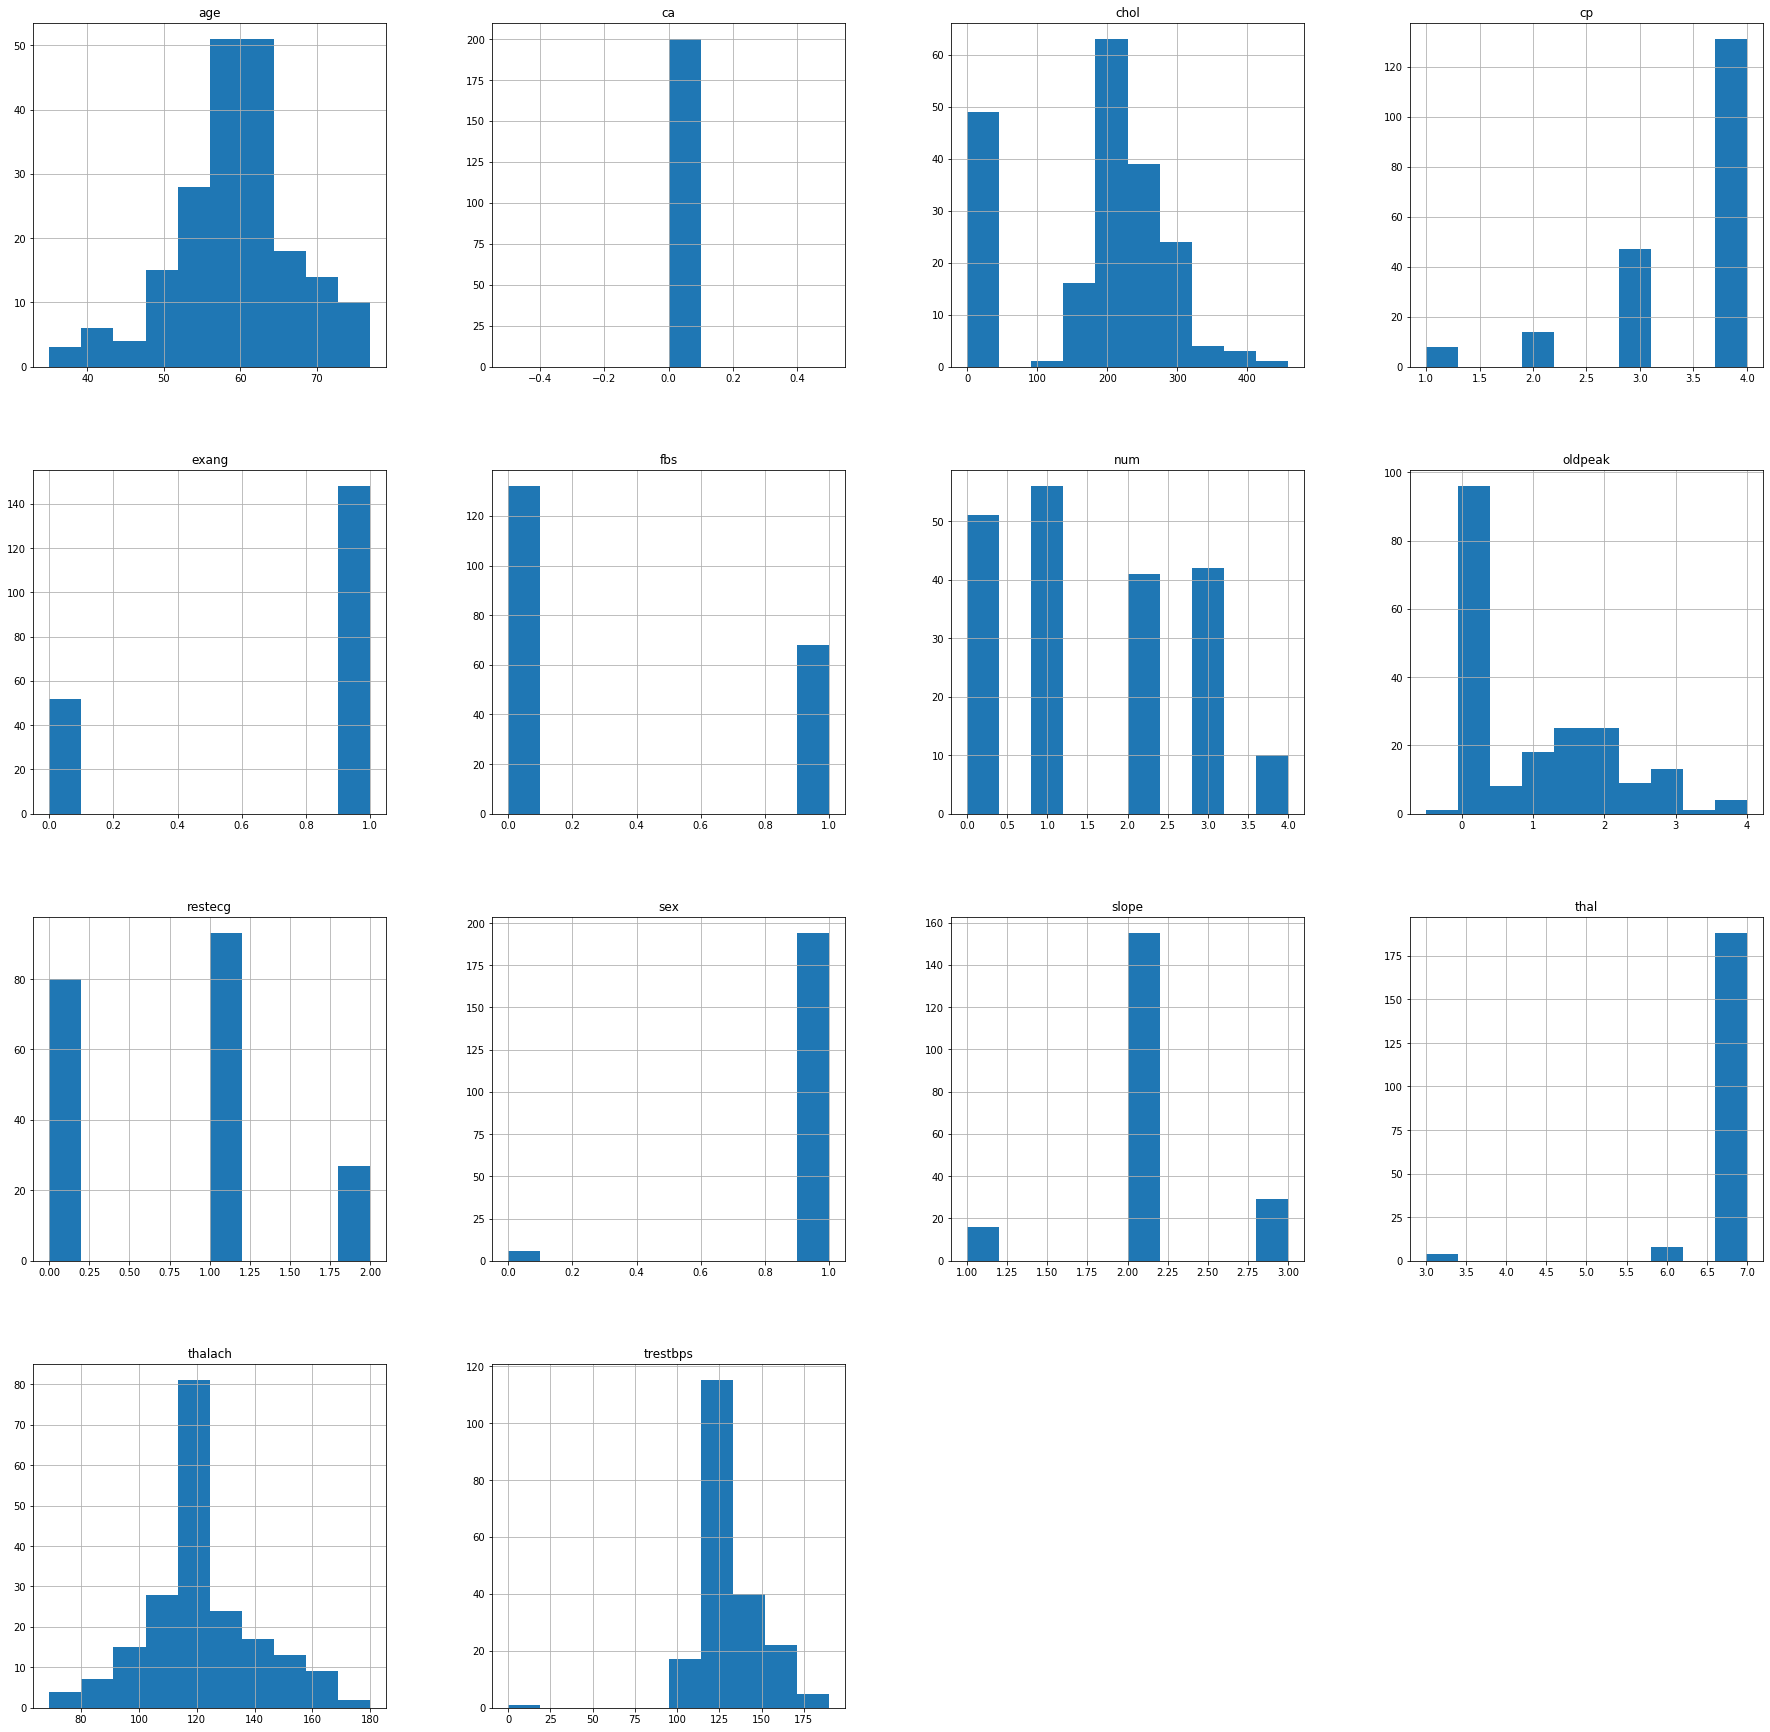

In [32]:
df.hist(figsize=(31,31))
plt.show()

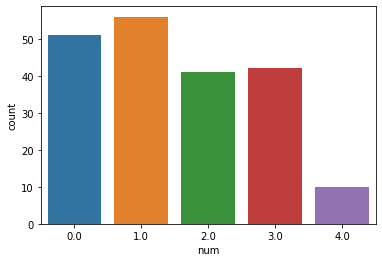

In [33]:
sns.countplot(x='num',data=df)
plt.show()

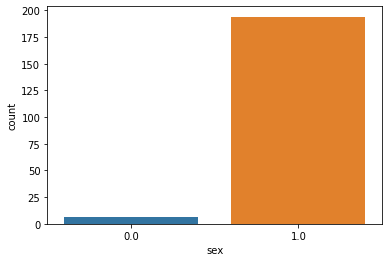

In [34]:
sns.countplot(x='sex',data=df)
plt.show()

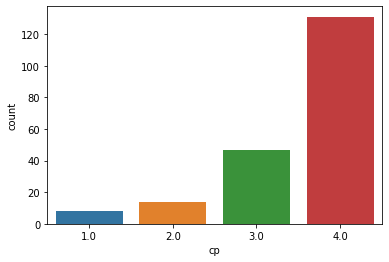

In [35]:
sns.countplot(x='cp',data=df)
plt.show()

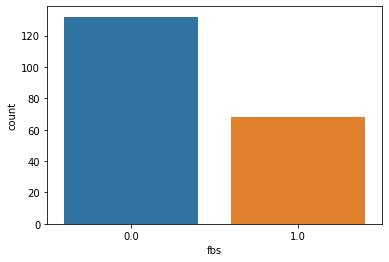

In [36]:
sns.countplot(x='fbs',data=df)
plt.show()

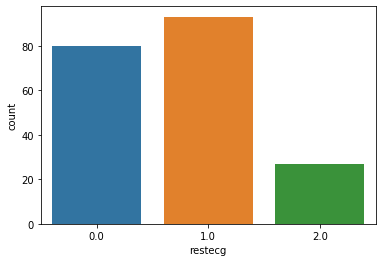

In [37]:
sns.countplot(x='restecg',data=df)
plt.show()

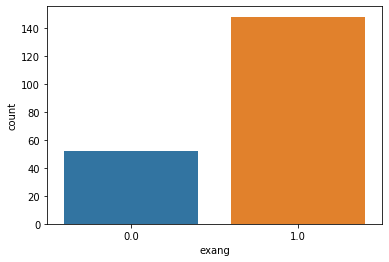

In [38]:
sns.countplot(x='exang',data=df)
plt.show()

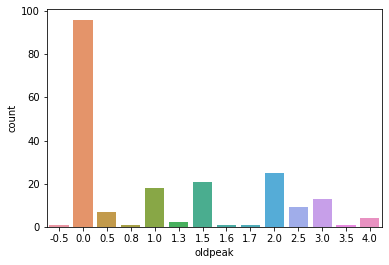

In [39]:
sns.countplot(x='oldpeak',data=df)
plt.show()

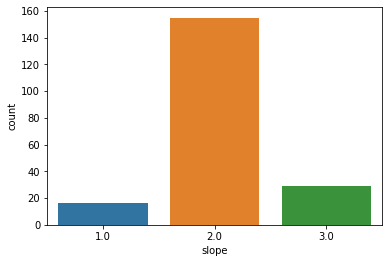

In [40]:
sns.countplot(x='slope',data=df)
plt.show()

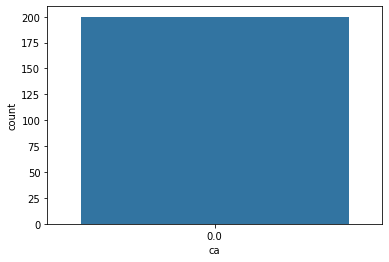

In [41]:
sns.countplot(x='ca',data=df)
plt.show()

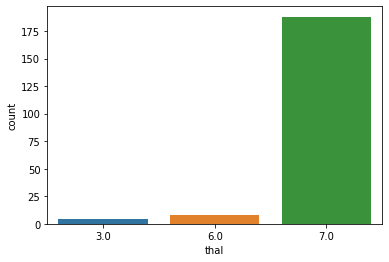

In [42]:
sns.countplot(x='thal',data=df)
plt.show()

In [43]:
#Bivariate Analysis

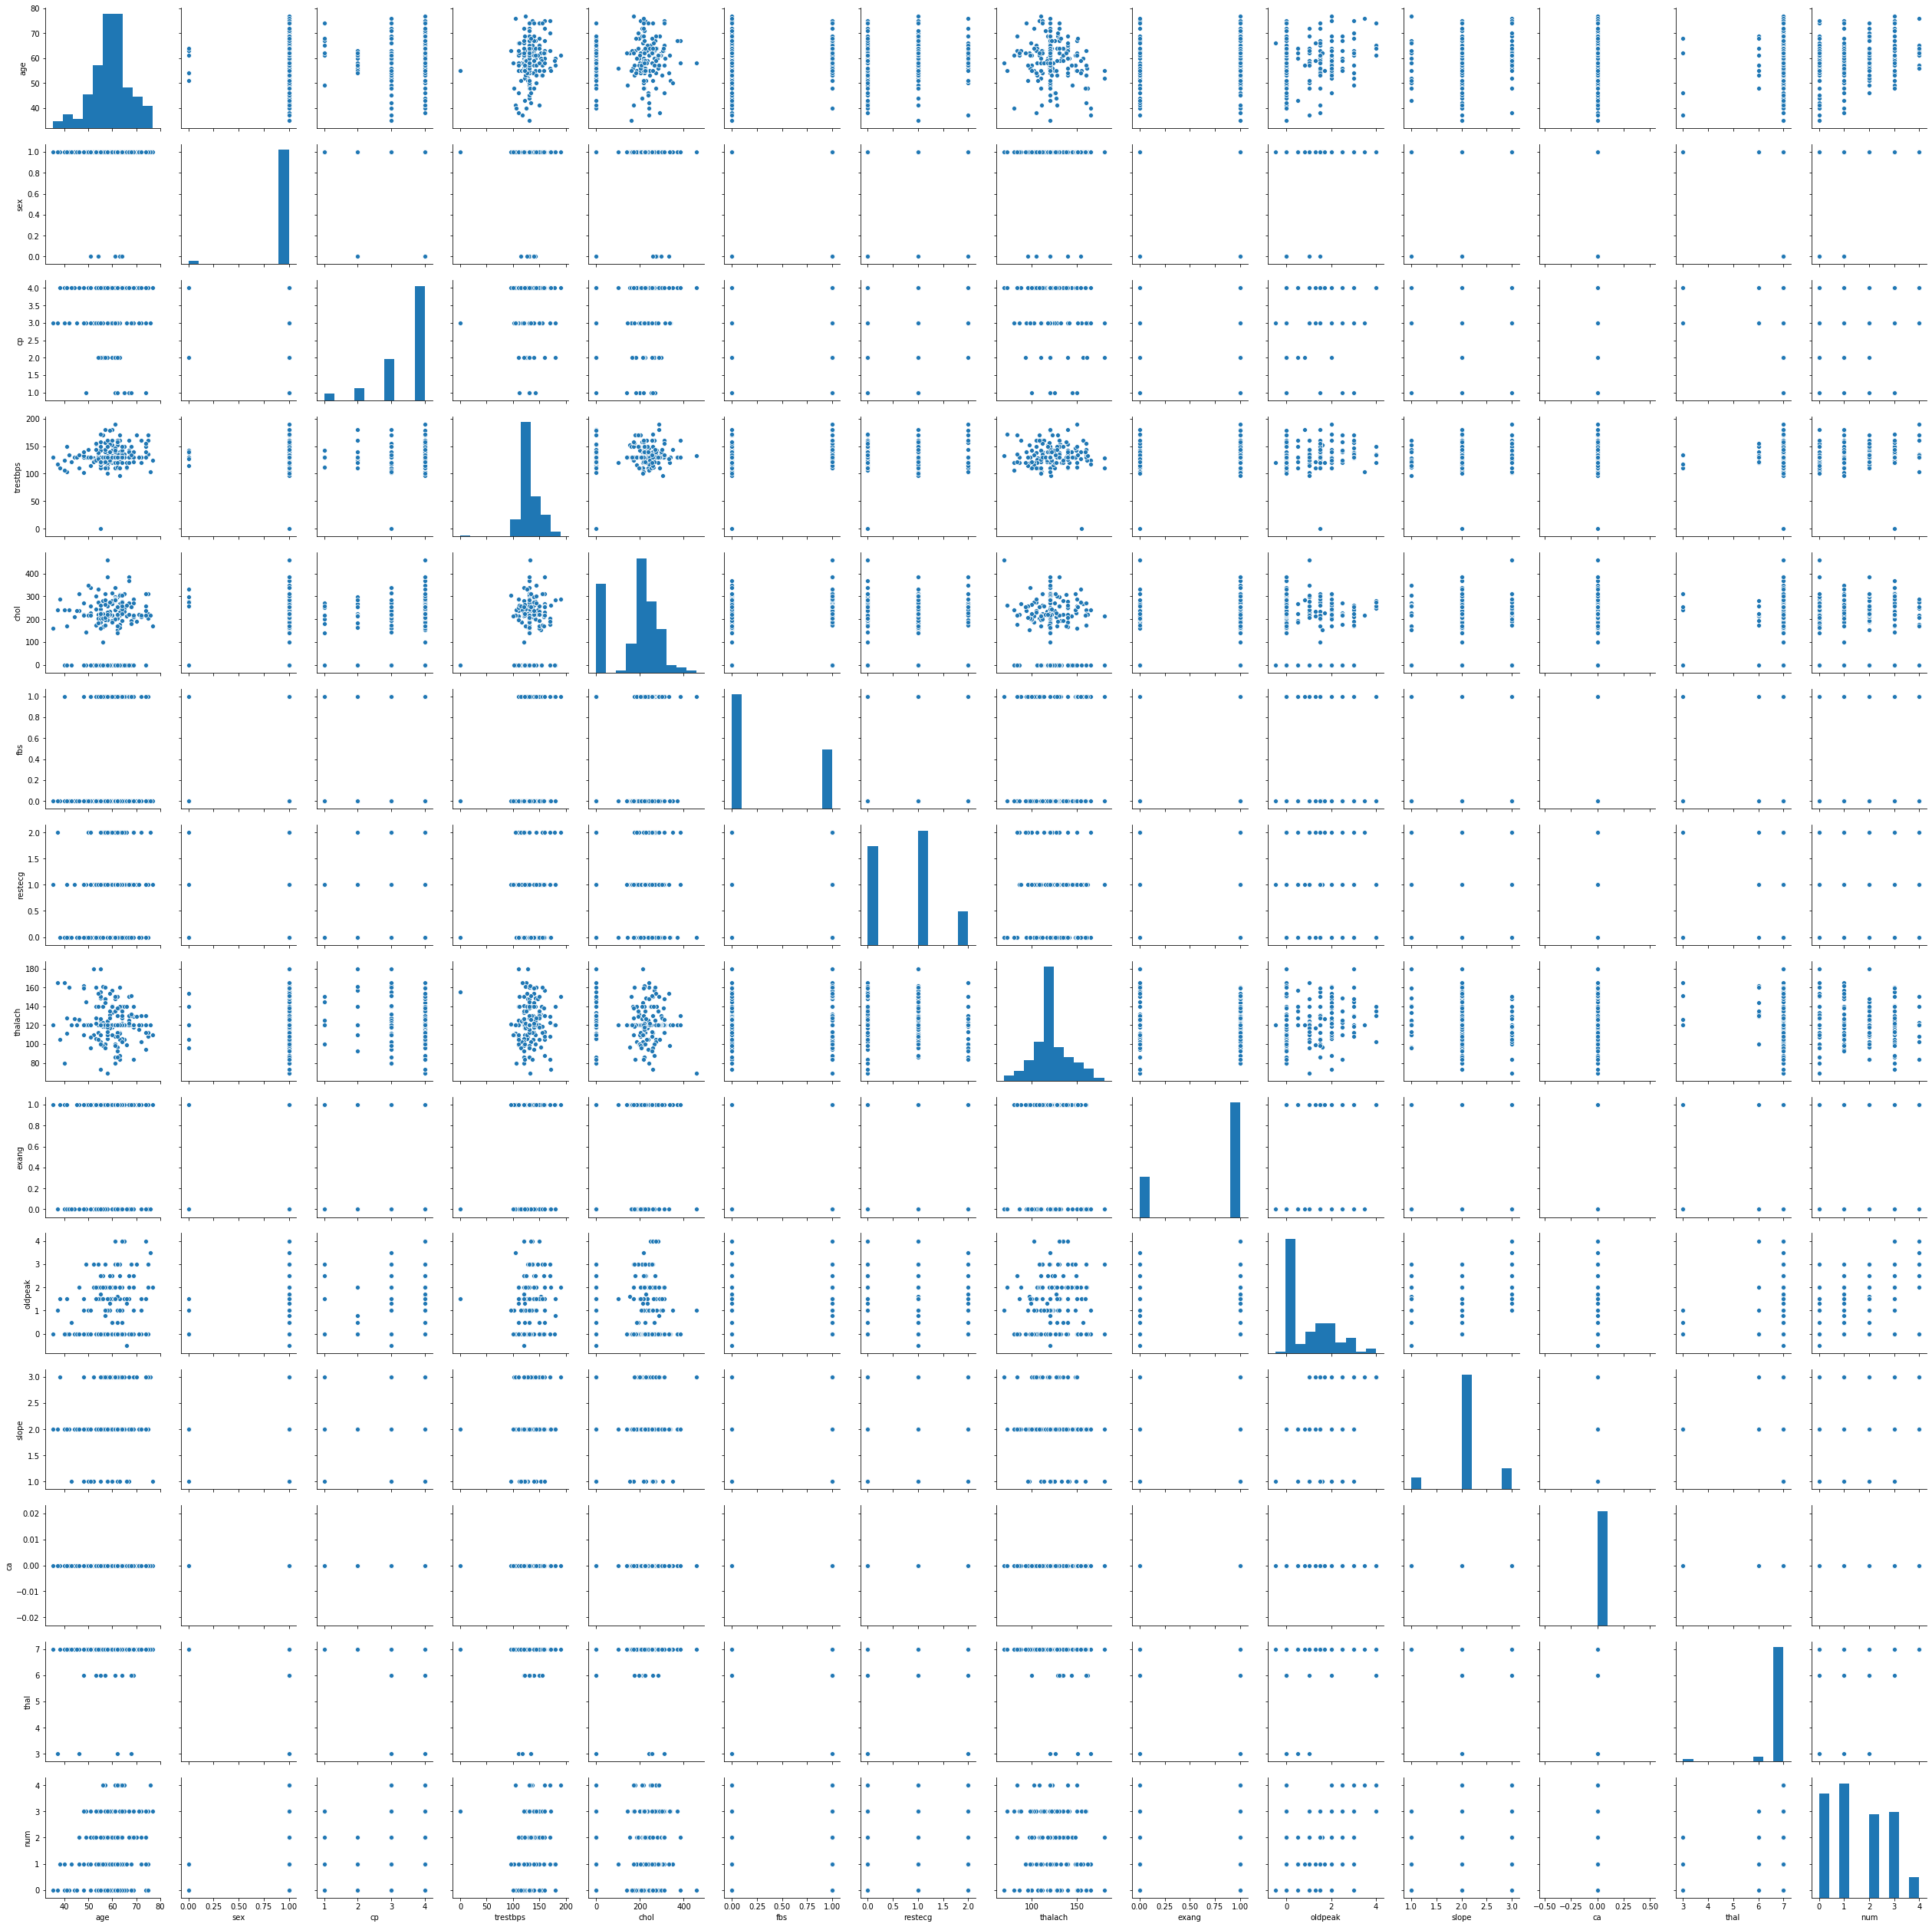

In [44]:
sns.pairplot(df)
plt.show()

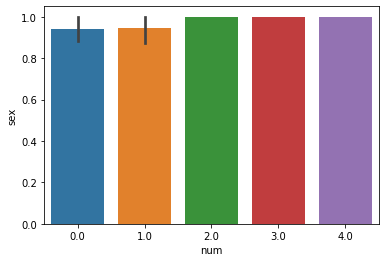

In [45]:
sns.barplot(x='num',y='sex',data=df)
plt.show()

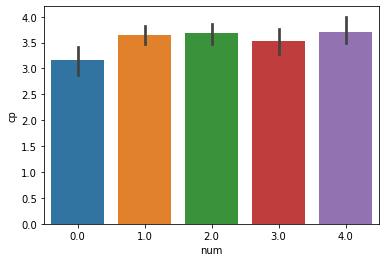

In [46]:
sns.barplot(x='num',y='cp',data=df)
plt.show()

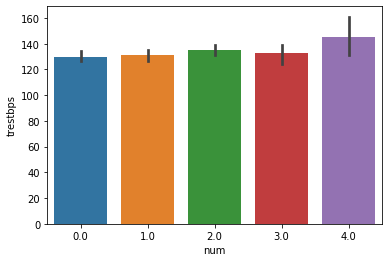

In [47]:
sns.barplot(x='num',y='trestbps',data=df)
plt.show()

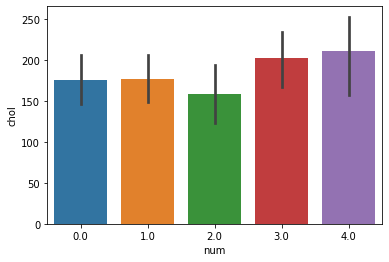

In [48]:
sns.barplot(x='num',y='chol',data=df)
plt.show()

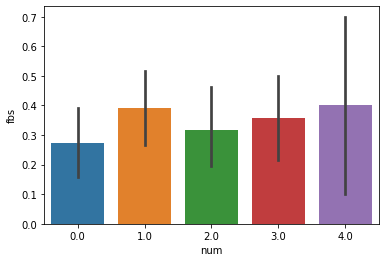

In [49]:
sns.barplot(x='num',y='fbs',data=df)
plt.show()

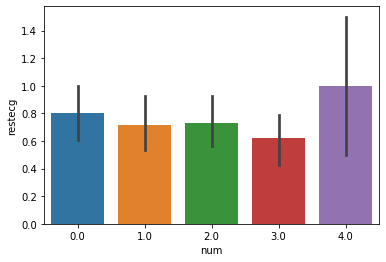

In [50]:
sns.barplot(x='num',y='restecg',data=df)
plt.show()

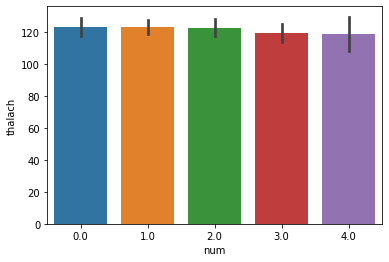

In [51]:
sns.barplot(x='num',y='thalach',data=df)
plt.show()

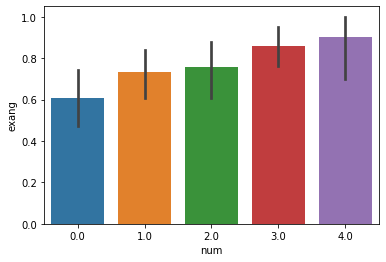

In [52]:
sns.barplot(x='num',y='exang',data=df)
plt.show()

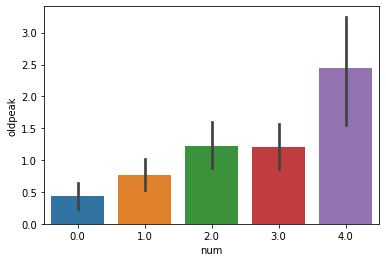

In [53]:
sns.barplot(x='num',y='oldpeak',data=df)
plt.show()

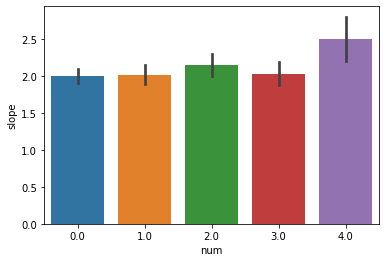

In [54]:
sns.barplot(x='num',y='slope',data=df)
plt.show()

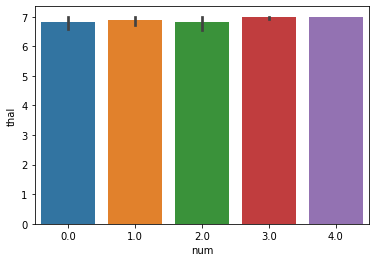

In [55]:
sns.barplot(x='num',y='thal',data=df)
plt.show()

In [56]:
collist=df.columns.values
ncol=12
nrows=10

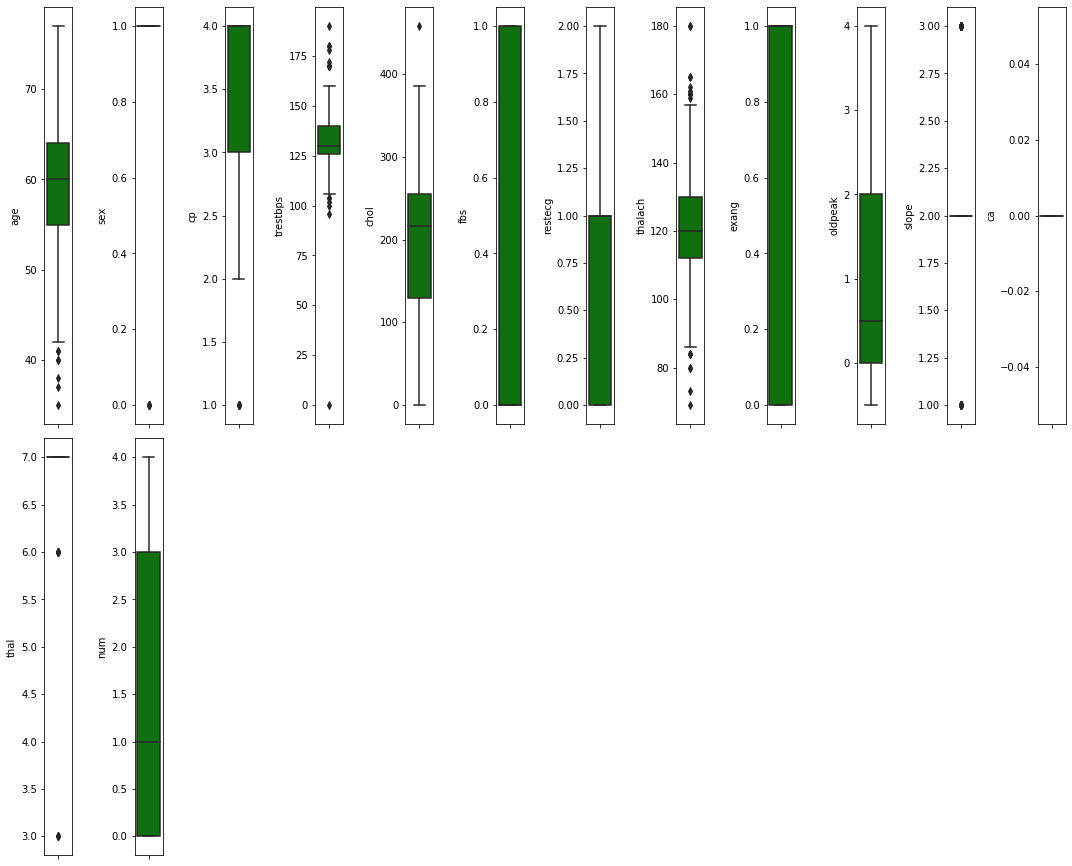

In [57]:
plt.figure(figsize=(15,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

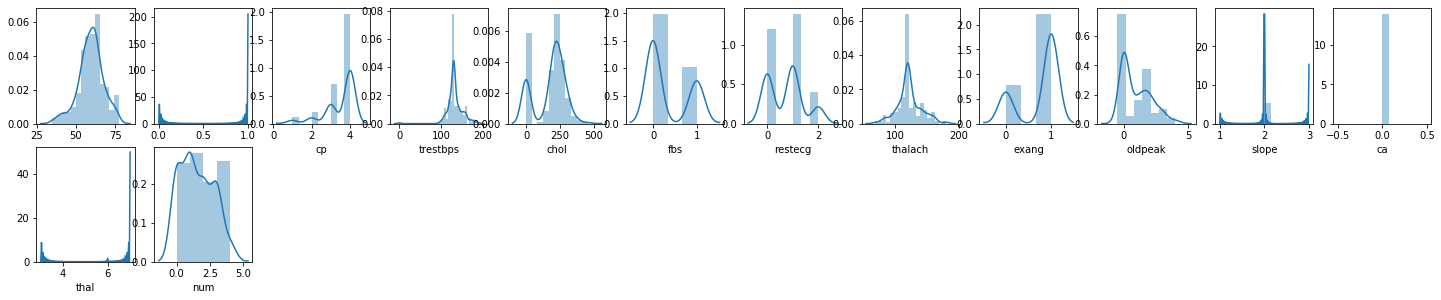

In [58]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

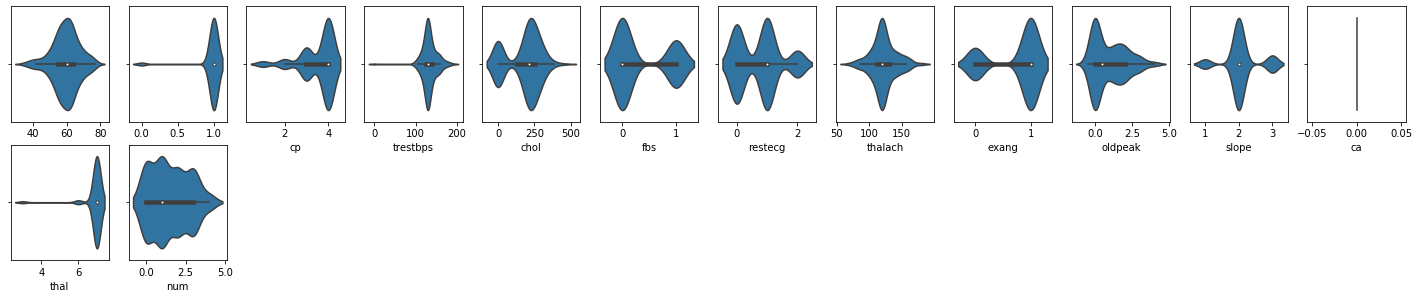

In [59]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.violinplot(df[collist[i]])

In [60]:
#Checking the skewness 
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.320144
chol       -0.602584
fbs         0.680636
restecg     0.391463
thalach     0.265689
exang      -1.102593
oldpeak     0.823429
slope       0.210521
ca          0.000000
thal       -5.920627
num         0.297393
dtype: float64

In [61]:
#As there are few skewed values, we try correct it by using log transformation
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [62]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.320144
chol       -0.602584
fbs         0.680636
restecg     0.391463
thalach     0.265689
exang      -1.102593
oldpeak     0.314899
slope       0.210521
ca          0.000000
thal       -5.920627
num         0.297393
dtype: float64

In [63]:
#converting target variable into binary values
bins= (-1,1 ,4)
values= ['< 50% diameter narrowing', '>50% diameter narrowing']
df['num']= pd.cut(df['num'], bins = bins, labels = values)

In [64]:
df['num'].value_counts()

< 50% diameter narrowing    107
>50% diameter narrowing      93
Name: num, dtype: int64

In [65]:
#Separating the variables like indenpendent and the target variable
x=df.drop(columns=["num"])
y=df[["num"]]

In [66]:
#Scaling the data using Standard Scaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [67]:
#Converting the binary string values using Label Encoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)

In [68]:
#Splitting the data into 2 sets training and the test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=69,stratify=y)

In [69]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(150, 13) (50, 13)
(150,) (50,)


In [70]:
KNN=KNeighborsClassifier(n_neighbors=4)
SV=SVC()
LR=LogisticRegression()
DTC=DecisionTreeClassifier(random_state=5)
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [71]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DTC))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


Accuracy_score =  0.62


Cross_Val_Score =  0.6524812030075188


roc_auc_score =  0.603059581320451


classification_report
               precision    recall  f1-score   support

           0       0.61      0.81      0.70        27
           1       0.64      0.39      0.49        23

    accuracy                           0.62        50
   macro avg       0.63      0.60      0.59        50
weighted avg       0.63      0.62      0.60        50



[[22  5]
 [14  9]]


F1_score= 0.4864864864864865


Precision_score= 0.6428571428571429


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degr

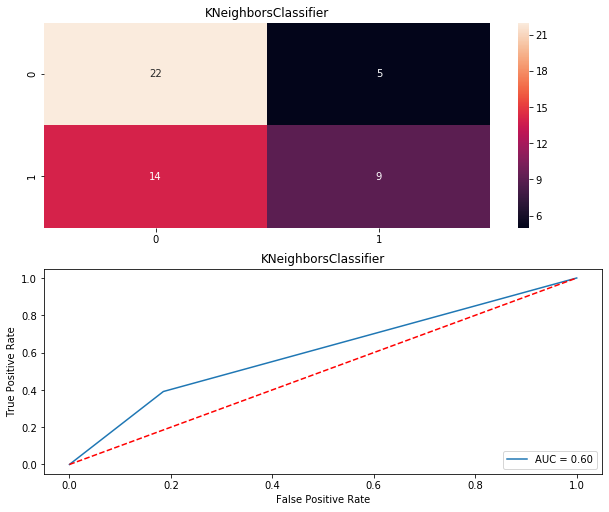

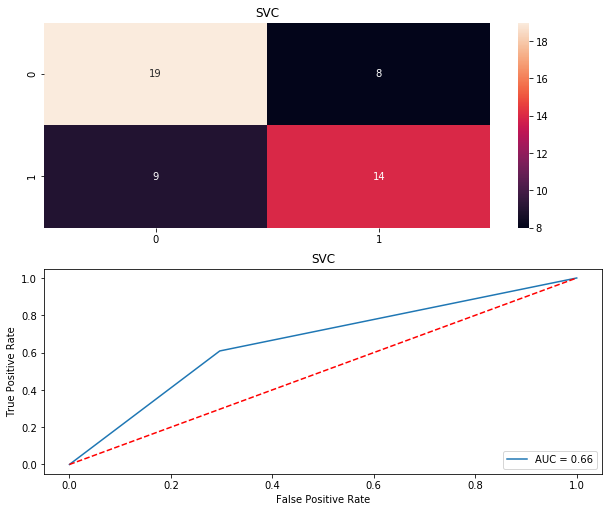

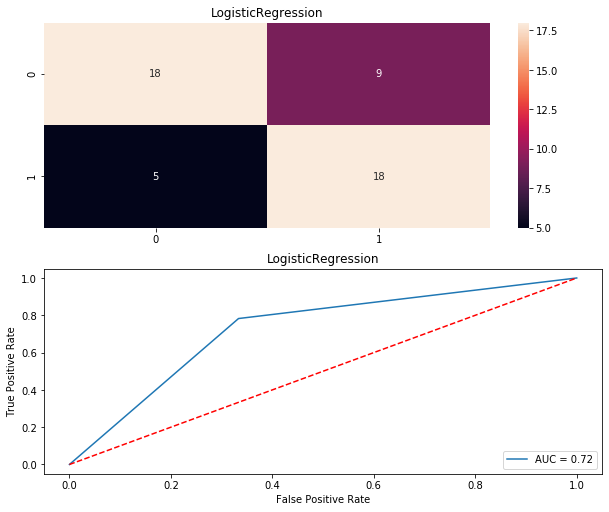

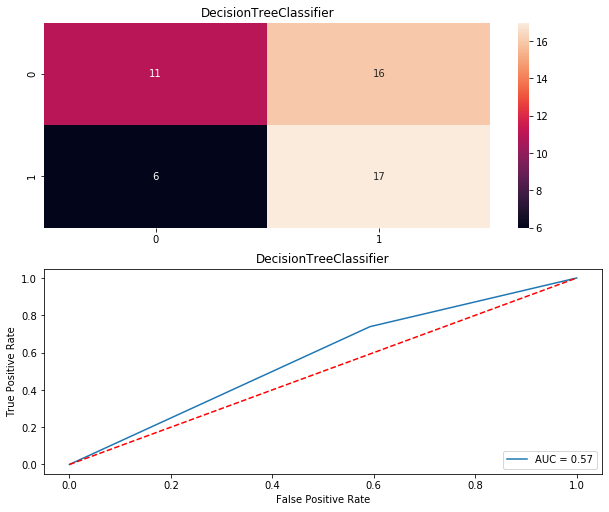

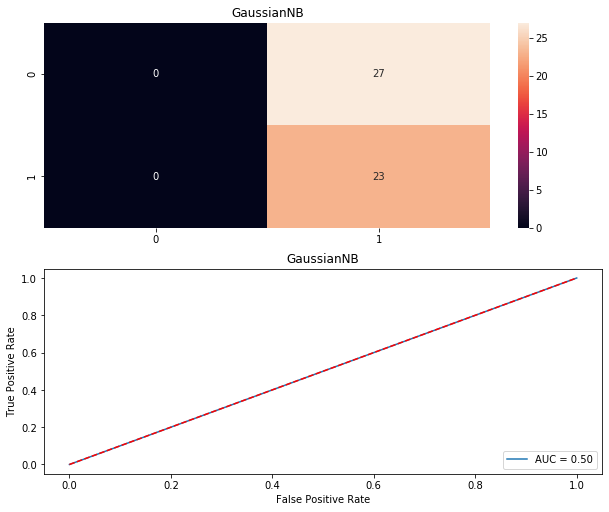

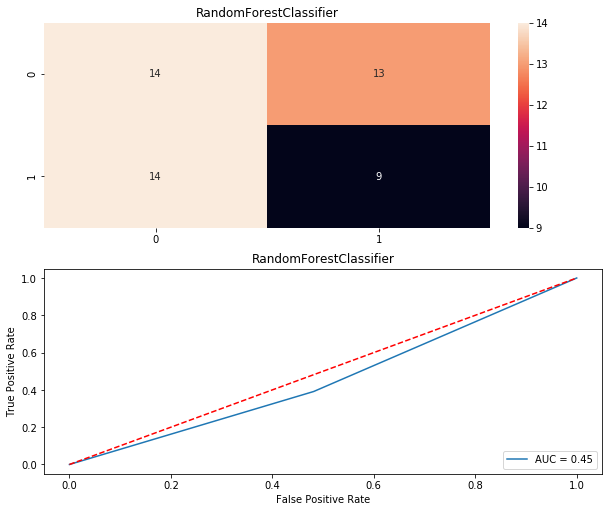

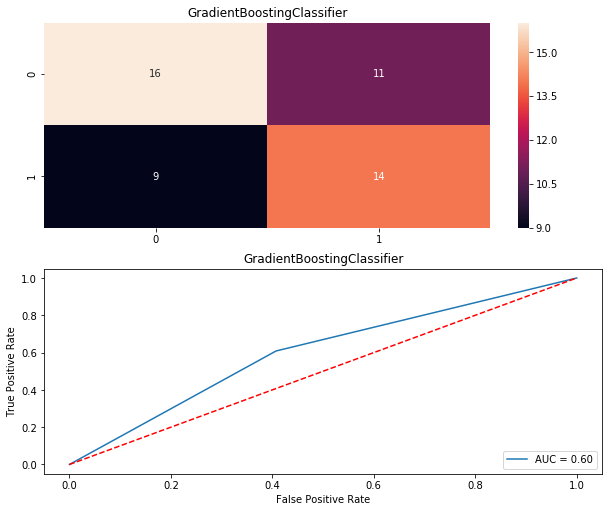

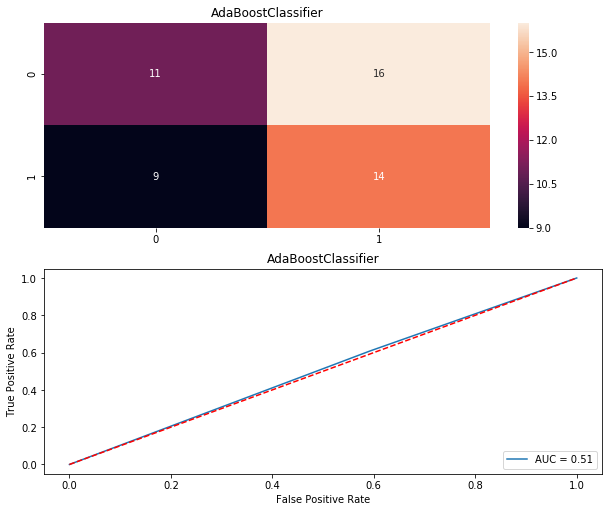

In [72]:
Model = []
score = []
cvs=[]
rocscore=[]
f1score=[]
ps=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    f1s=f1_score(y_test,pred)
    print('F1_score=',f1s)
    f1score.append(f1s*100)
    print('\n')
    precisionscore=precision_score(y_test,pred)
    print('Precision_score=',precisionscore)
    ps.append(precisionscore*100)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [73]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore,'F1_score':f1s,'Precision_score':ps})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve,F1_score,Precision_score
0,KNeighborsClassifier,62.0,65.248120,60.305958,0.528302,64.285714
1,SVC,66.0,66.721805,65.619968,0.528302,63.636364
2,LogisticRegression,72.0,67.298246,72.463768,0.528302,66.666667
3,DecisionTreeClassifier,56.0,63.621554,57.326892,0.528302,51.515152
4,GaussianNB,46.0,49.474937,50.000000,0.528302,46.000000
5,RandomForestClassifier,46.0,66.621554,45.491143,0.528302,40.909091
6,GradientBoostingClassifier,60.0,65.573935,60.064412,0.528302,56.000000
7,AdaBoostClassifier,50.0,59.635338,50.805153,0.528302,46.666667


In [82]:
#Lets use GridsearchCV for hyperparamenter tuning for Logistic Regression
def maxacc_score(regr,x,y):
    max_acc_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.25,stratify=y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [83]:
pipeline=Pipeline([("ss",StandardScaler()),("LR",LogisticRegression())])
parameters = {"LR__max_iter":[10,100,200,300,400,500]}
clf = GridSearchCV(pipeline, parameters, cv=10,scoring="accuracy")
clf.fit(x,y)
clf.best_params_

{'LR__max_iter': 10}

In [84]:
pipeline_LR=Pipeline([("ss",StandardScaler()),("LR",LogisticRegression(max_iter=10))])
maxacc_score(pipeline_LR,x,y)

max accuracy score corresponding to  28  is  0.78


28

In [77]:
from sklearn.externals import joblib
joblib.dump(LR,"Heart_Disease_LR.pkl")

['Heart_Disease_LR.pkl']